<a href="https://colab.research.google.com/github/HernanContreras19/ASSIGNAMENTS/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7.- Convolutional Neural Network.
Raul Hernan Contreras Esparza
1962147
N4

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8529 - loss: 0.4868 - val_accuracy: 0.9600 - val_loss: 0.1282
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9570 - loss: 0.1432 - val_accuracy: 0.9705 - val_loss: 0.0930
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9686 - loss: 0.1018 - val_accuracy: 0.9737 - val_loss: 0.0857
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9724 - loss: 0.0905 - val_accuracy: 0.9756 - val_loss: 0.0759
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9763 - loss: 0.0735 - val_accuracy: 0.9764 - val_loss: 0.0725
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9795 - loss: 0.0620 - val_accuracy: 0.9780 - val_loss: 0.0732
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9815 - loss: 0.0566 - val_accuracy: 0.9787 - val_loss: 0.0704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9822 - loss: 0.0541 

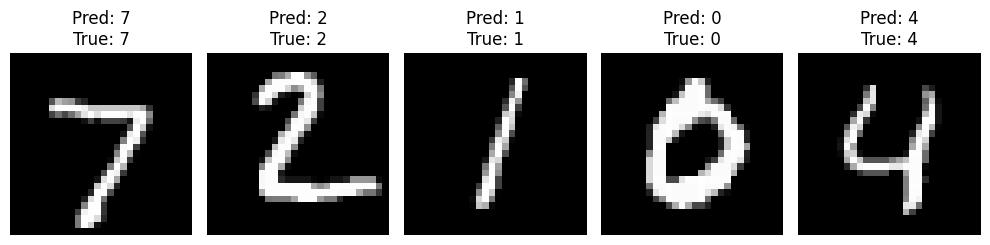

In [2]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist

# Step 2: Load Data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Step 3: Data Preprocessing
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data = train_data.reshape(train_data.shape[0], 28 * 28)
test_data = test_data.reshape(test_data.shape[0], 28 * 28)

# Step 4: Model Definition
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 5: Model Compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Model Training
history = model.fit(train_data, train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels),
                    batch_size=32)

# Step 7: Model Evaluation
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

# Step 8: Perform Predictions
predictions = model.predict(test_data)

# Step 9: Display Predictions
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    print(f"Prediction: {predicted_label}, Actual: {true_label}")

# Step 10: Visualization of Predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {test_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
